# Aashray Anand
5/24/2019, 11:20 PM
 
This notebook contains different experiments, working with the
 
NBA stats data from the below blog post, and practicing using pyspark

"Using Apache Spark for Sports Analytics: https://content.pivotal.io/blog/how-data-science-assists-sports"

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

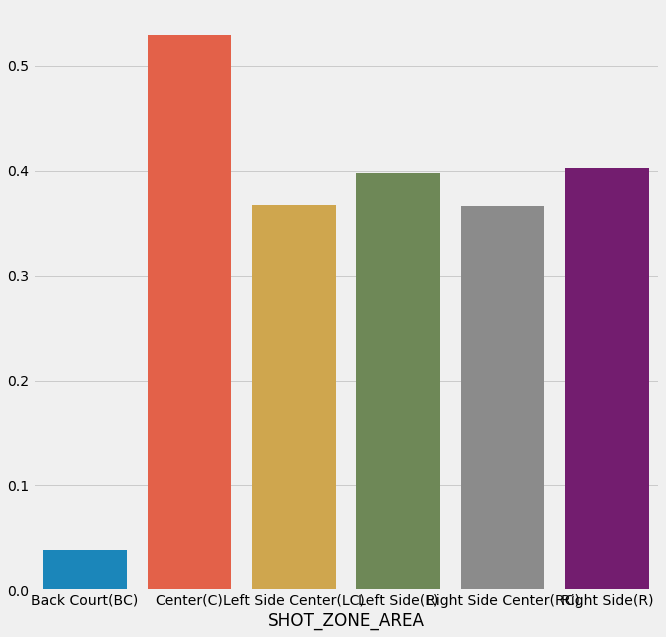

In [355]:
shots = pd.read_csv('./shots/current_year_shot_data.csv')
all_year_shots = pd.read_csv('shots/all_year_shot_data.csv')
percentage_per_area = shots.groupby(['SHOT_ZONE_AREA'])['SHOT_MADE_FLAG'].sum() / shots.groupby('SHOT_ZONE_AREA')['SHOT_ATTEMPTED_FLAG'].sum()
plt.figure(figsize=(10,10))
sns.barplot(x=percentage_per_area.index, y=percentage_per_area.values)

In [356]:
shots.SHOT_ZONE_BASIC.unique()

array(['Restricted Area', 'Above the Break 3', 'In The Paint (Non-RA)',
       'Right Corner 3', 'Mid-Range', 'Left Corner 3', 'Backcourt'], dtype=object)

In [198]:
max_player_per_year = {
    1999: 'Shaquille O\'Neal',
    2000: 'Allen Iverson',
    2001: 'Allen Iverson',
    2002: 'Tracy McGrady',
    2003: 'Tracy McGrady',
    2004: 'Allen Iverson',
    2005: 'Kobe Bryant',
    2006: 'Kobe Bryant',
    2007: 'LeBron James',
    2008: 'Dwyane Wade',
    2009: 'Kevin Durant',
    2010: 'Kevin Durant',
    2011: 'Kevin Durant',
    2012: 'Carmelo Anthony',
    2013: 'Kevin Durant',
    2014: 'Russell Westbrook',
    2015: 'Stephen Curry',
    2016: 'Russell Westbrook',
    2017: 'James Harden',
    2018: 'James Harden',
}

In [169]:
def clean_shots(shots):
    shots['YEAR'] = shots['GAME_DATE'].astype(str)
    for i, row in shots.iterrows():
        res = shots.at[i, 'YEAR']
        shots.at[i, 'YEAR'] = res[0:4]
    shots['YEAR'] = shots['YEAR'].astype(int)
    return shots
shots = clean_shots(shots)
all_year_shots = clean_shots(all_year_shots)

In [170]:
# we can draw a set of matplotlib shapes on the above plot, to be able to build a more powerful data visualization
from matplotlib.patches import Circle, Rectangle, Arc

def make_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    elem = []
    rim = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    elem.append(rim)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    elem.append(corner_three_a)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    elem.append(corner_three_b)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    elem.append(three_arc)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    back_bound = Rectangle((-250,-47.5), 500, 0, color=color, linewidth=lw)
    left_bound = Rectangle((-250,-47.5), 0, 470, color=color, linewidth=lw)
    right_bound = Rectangle((250,-47.5), 0, 470, color=color, linewidth=lw)
    center_court = Rectangle((-250, 422.5), 500, 0, color=color, linewidth=lw)
    elem.append(center_inner_arc)
    elem.append(center_outer_arc)
    elem.append(backboard)
    elem.append(outer_box)
    elem.append(inner_box)
    elem.append(top_free_throw)
    elem.append(bottom_free_throw)
    elem.append(restricted)
    elem.append(back_bound)
    elem.append(left_bound)
    elem.append(right_bound)
    elem.append(center_court)
    for e in elem:
        ax.add_patch(e)
    return ax

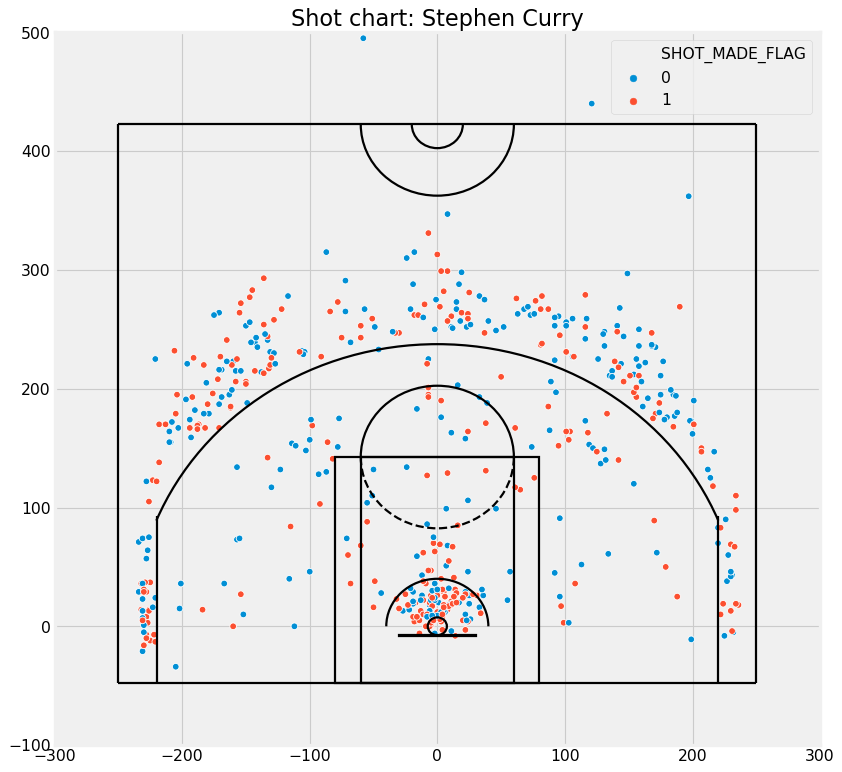

<Figure size 432x288 with 0 Axes>

In [247]:
def make_shot_chart(shots, name=None, ax=None, year=None):
    if name is not None:
        data = shots[(shots['PLAYER_NAME'] == name)]
    else:
        data = shots
    if year is not None:
        data = data[data['YEAR'] == year]
    plt.figure(num=None, figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.gca() if ax is None else ax
    make_court(ax=ax, outer_lines=True)
    sns.scatterplot(x="LOC_X", y="LOC_Y", data=data, hue='SHOT_MADE_FLAG', ax=ax)
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.xlabel("")
    plt.ylabel("")
    plt.title("Shot chart: {}".format(name))
    plt.show()
    plt.savefig("./shot_charts/{}_{}.png".format(name, year))
make_shot_chart(shots, name="Stephen Curry", year=2018)

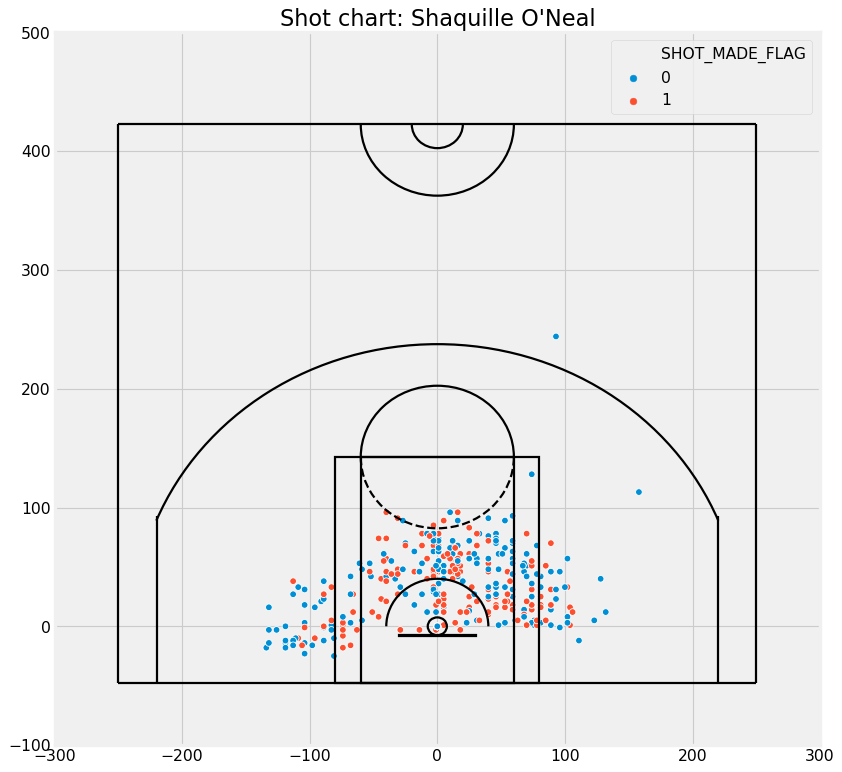

In [195]:
make_shot_chart(all_year_shots, name="Shaquille O'Neal", year=1999)

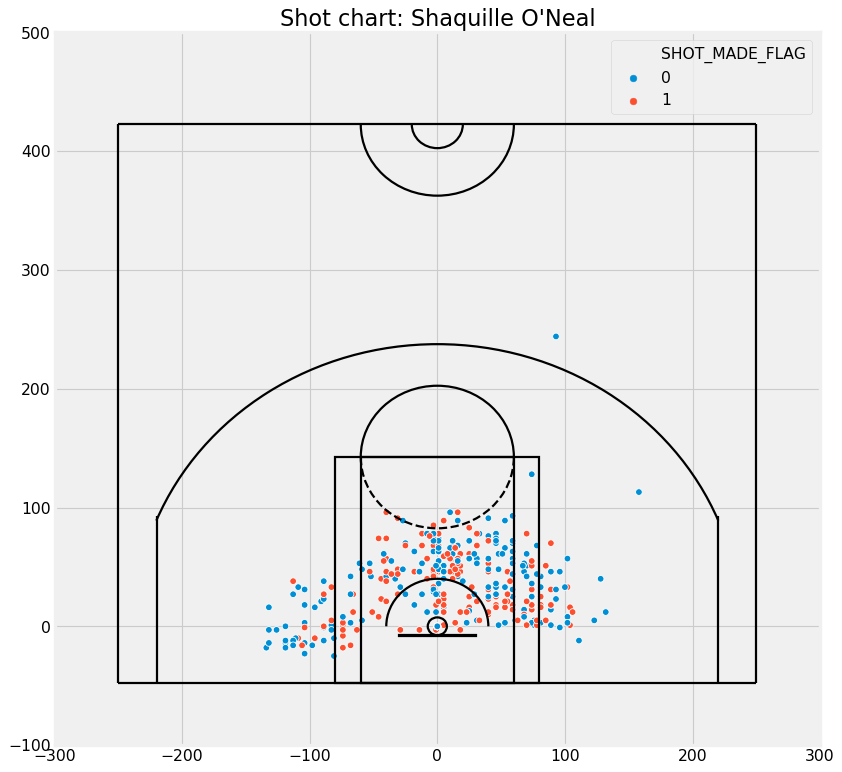

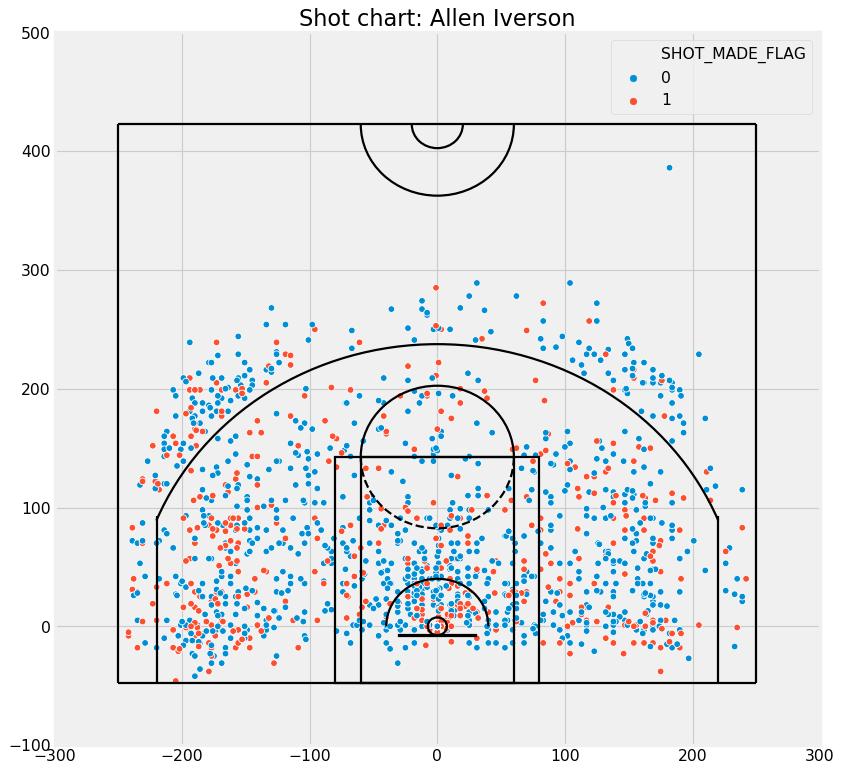

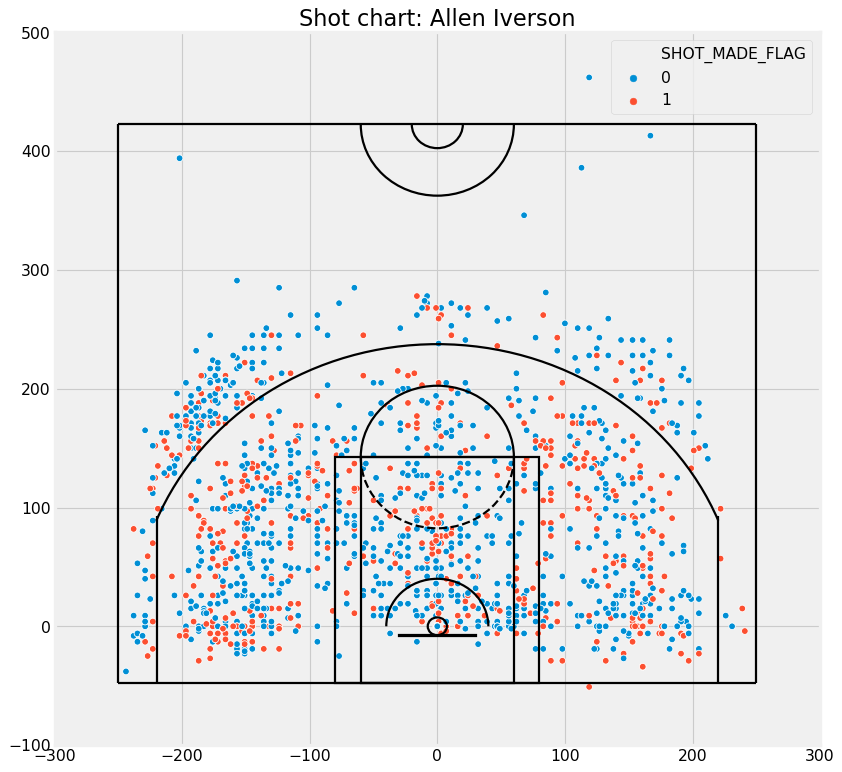

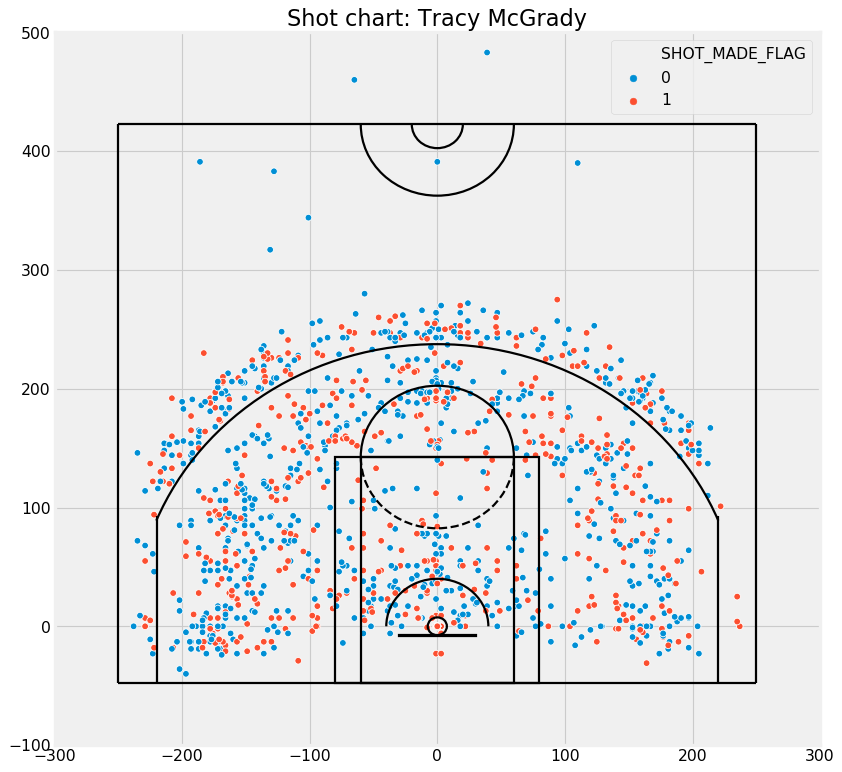

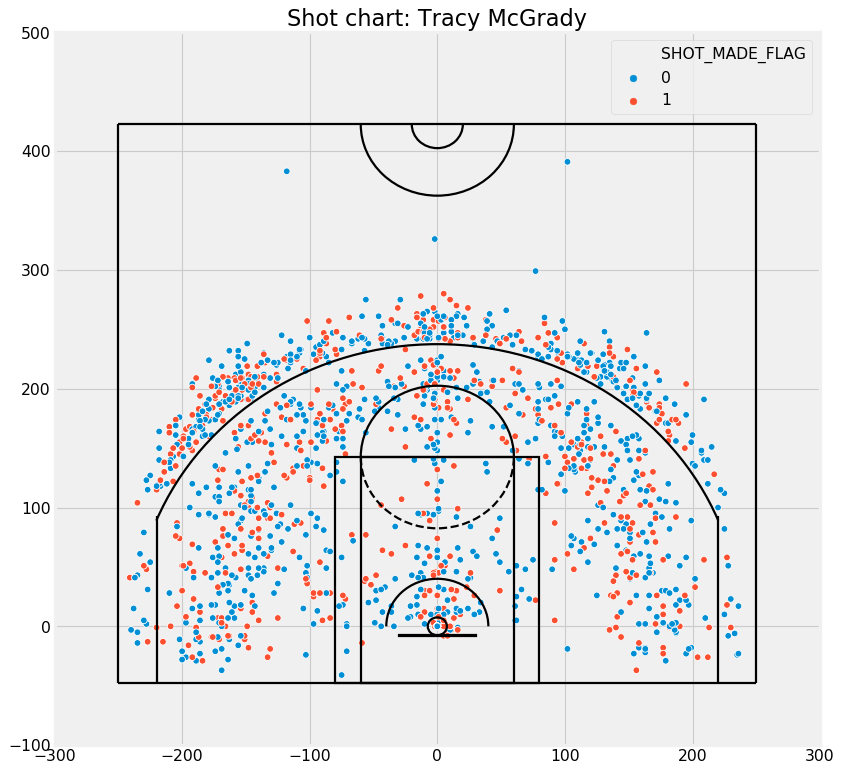

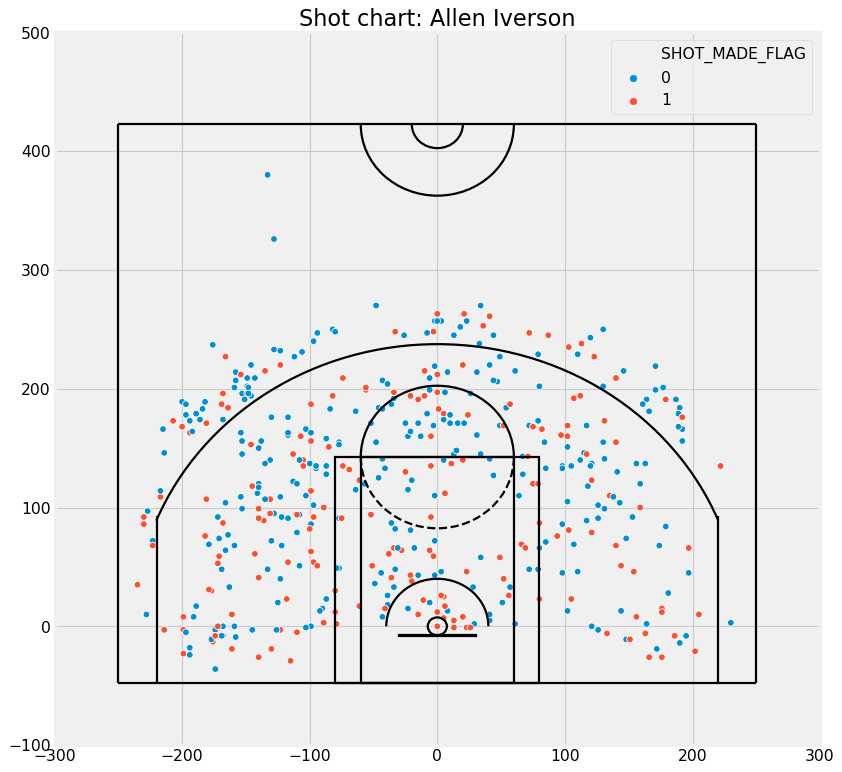

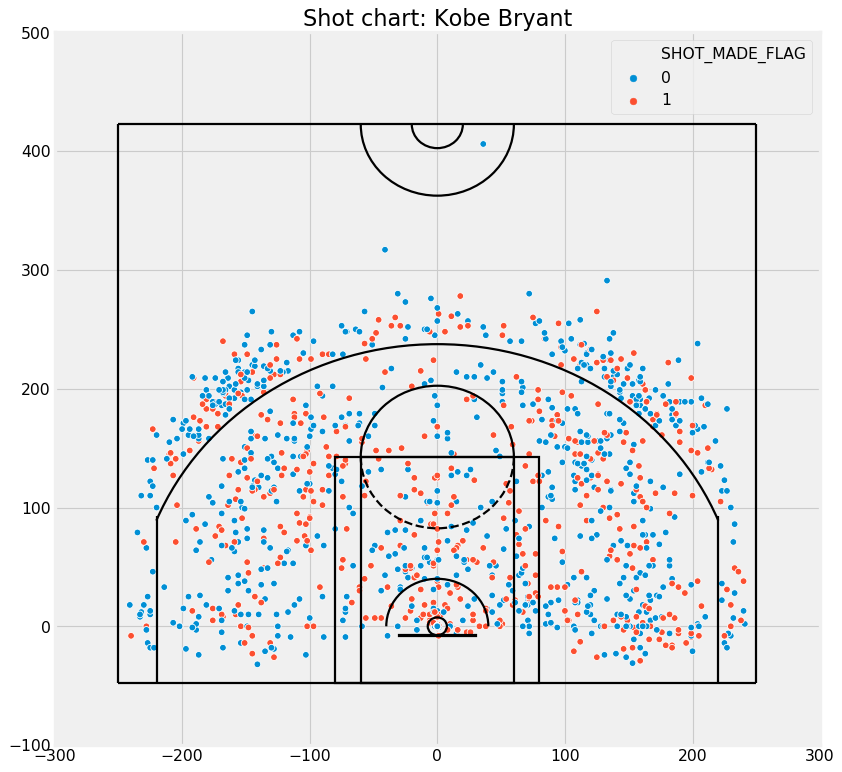

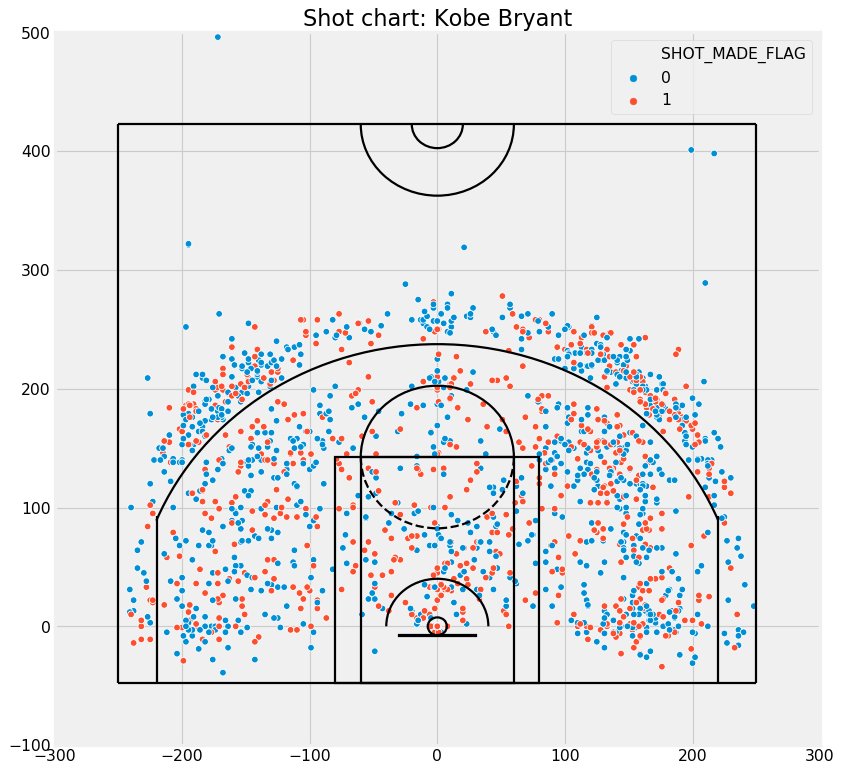

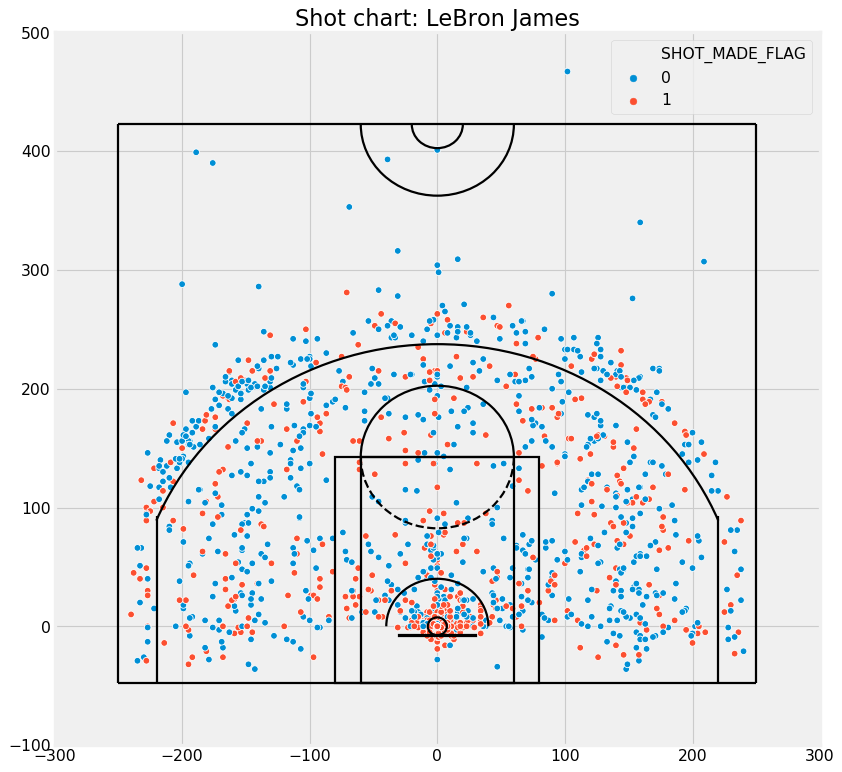

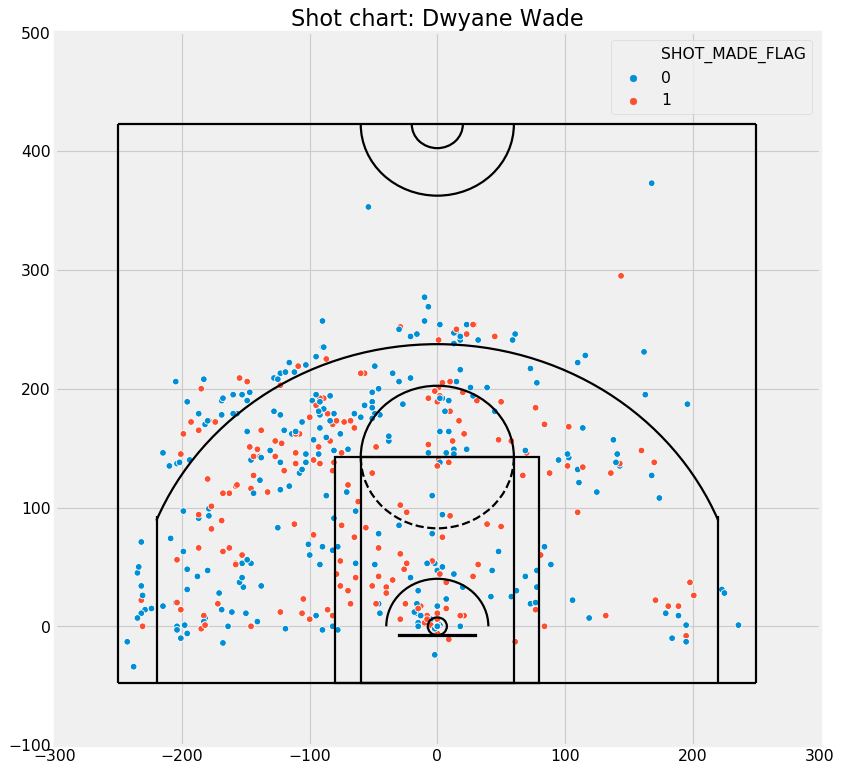

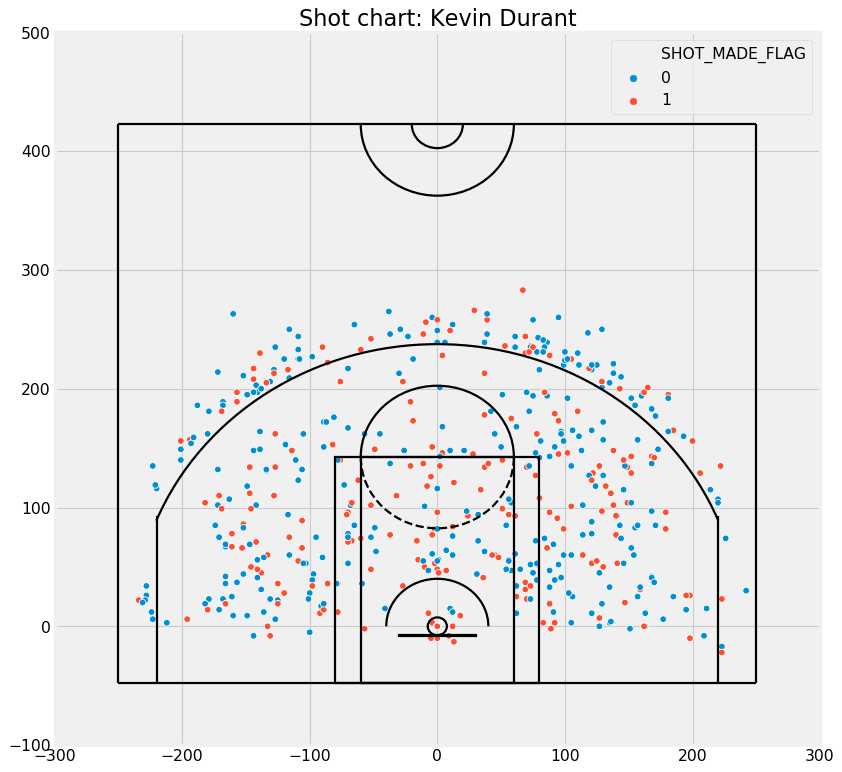

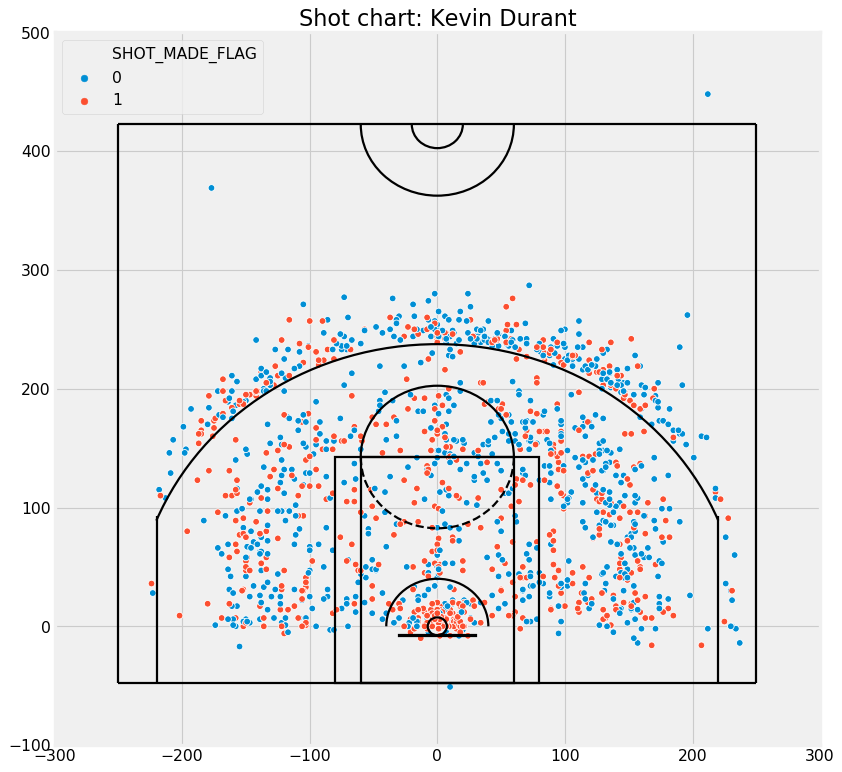

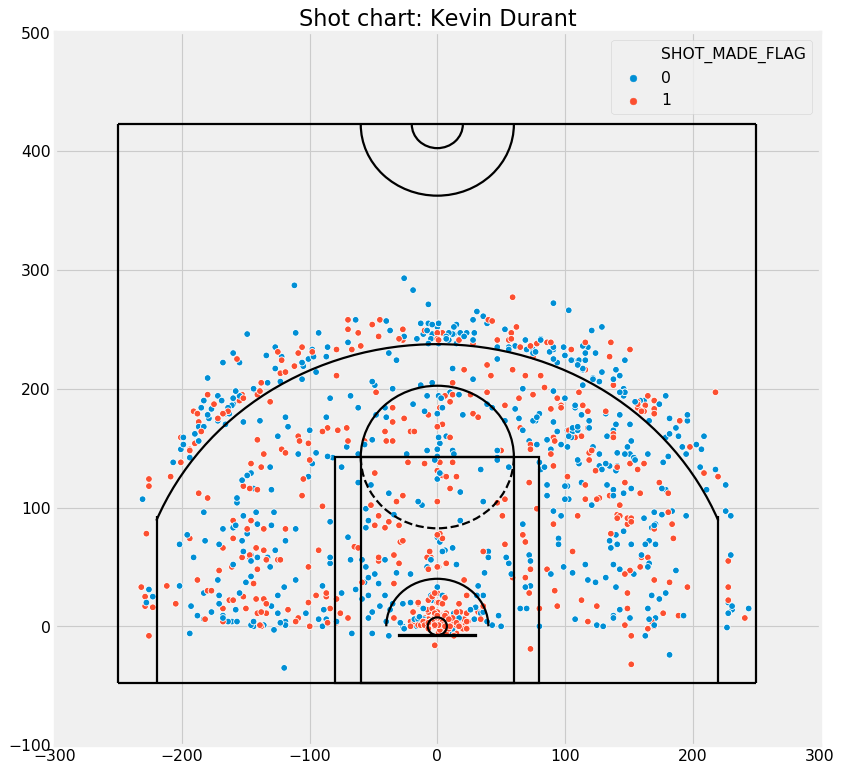

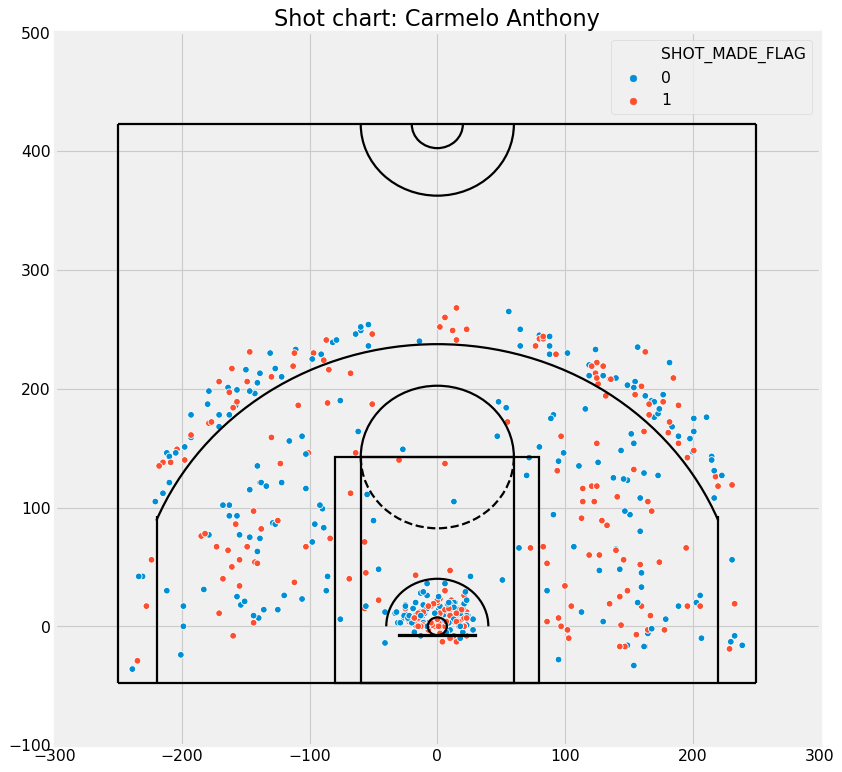

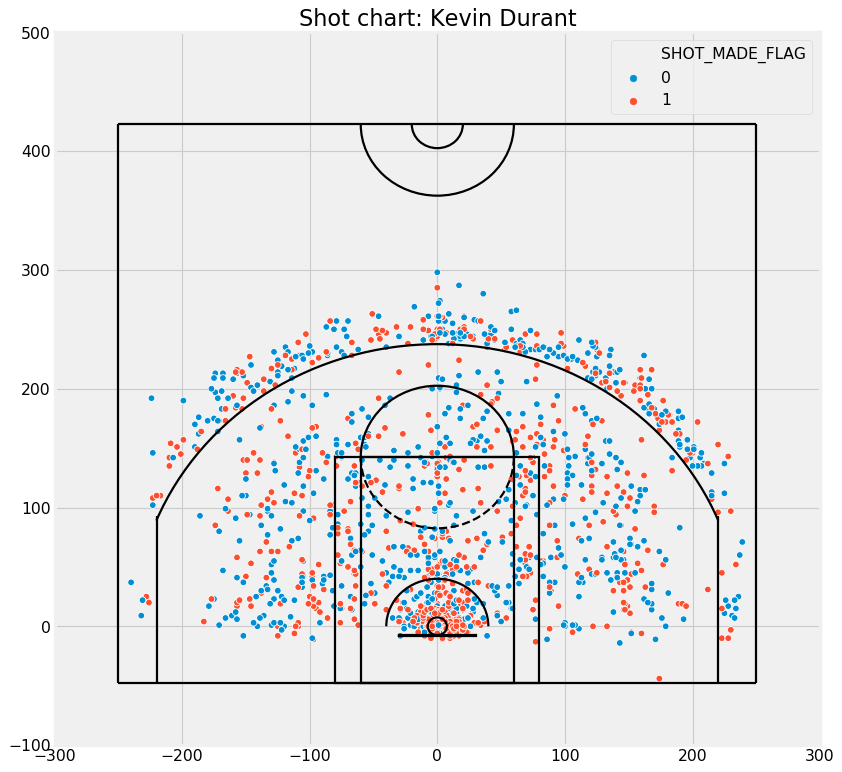

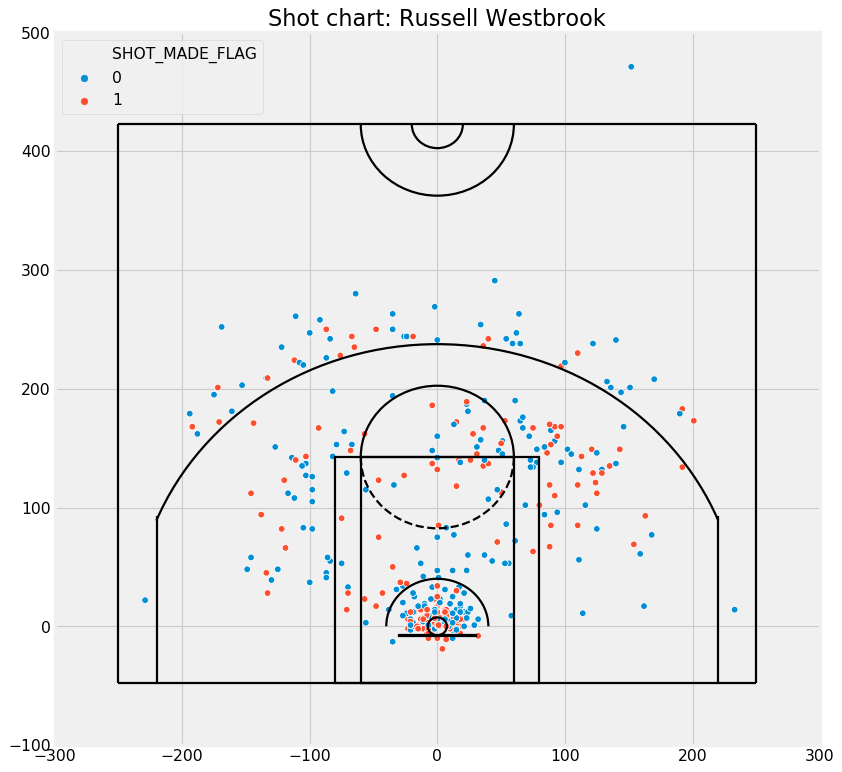

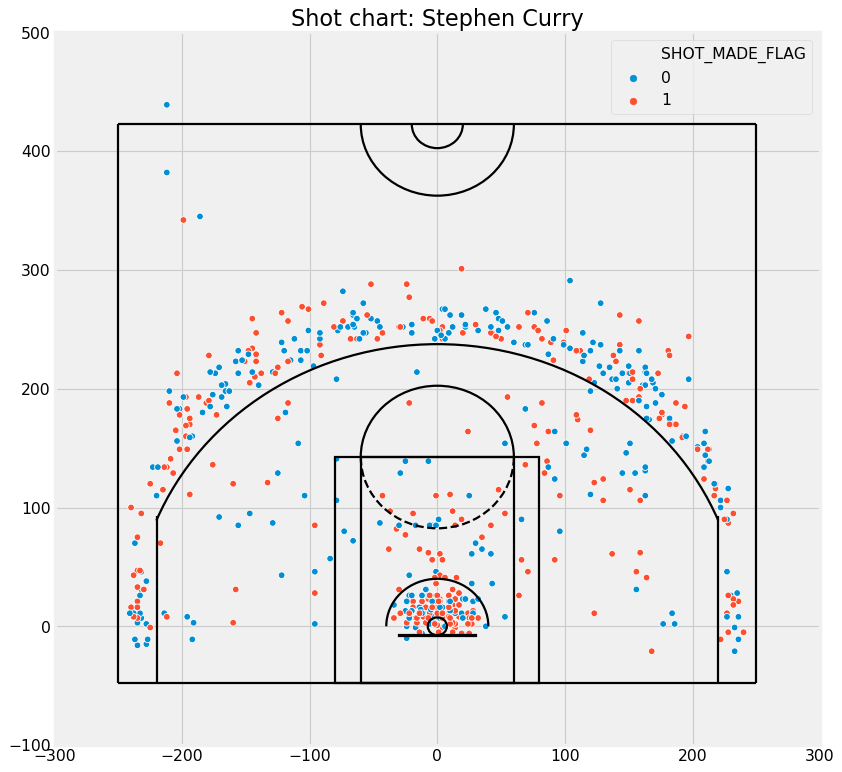

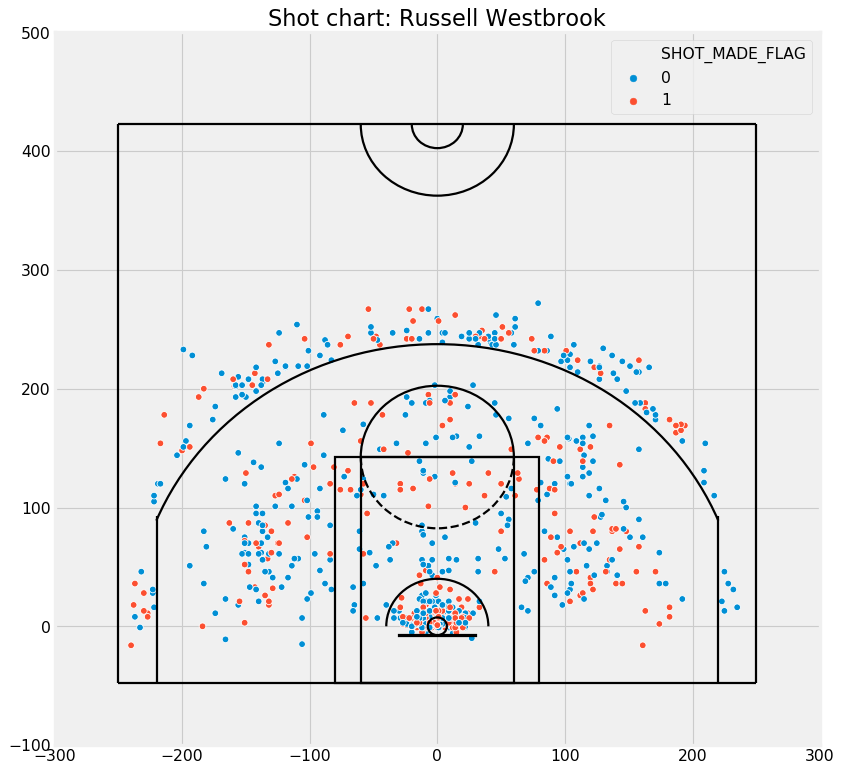

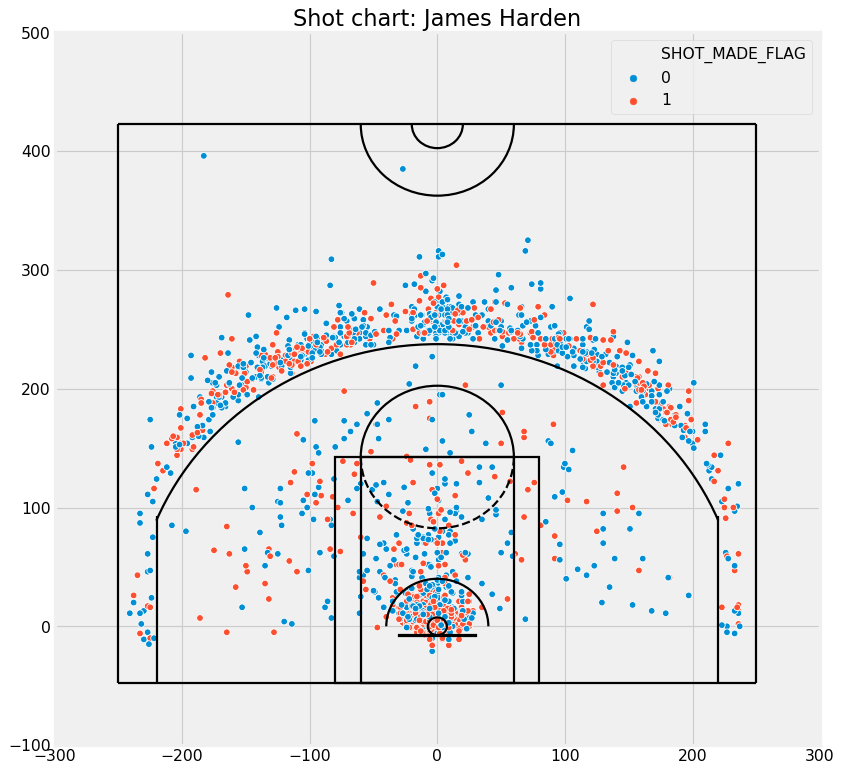

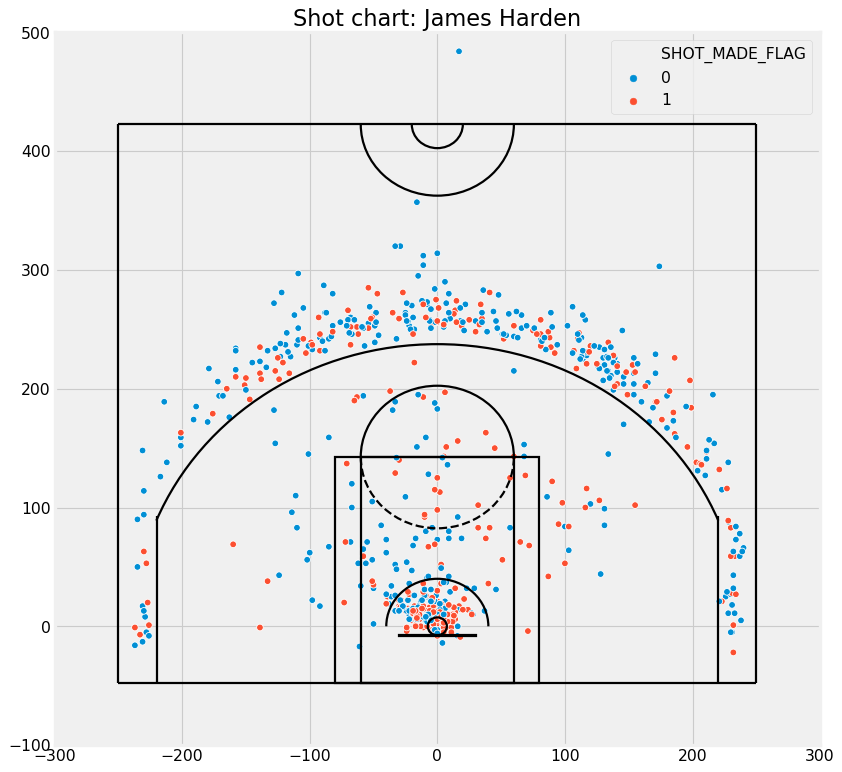

In [199]:
for k, v in max_player_per_year.items():
    make_shot_chart(all_year_shots, name=v, year=k)

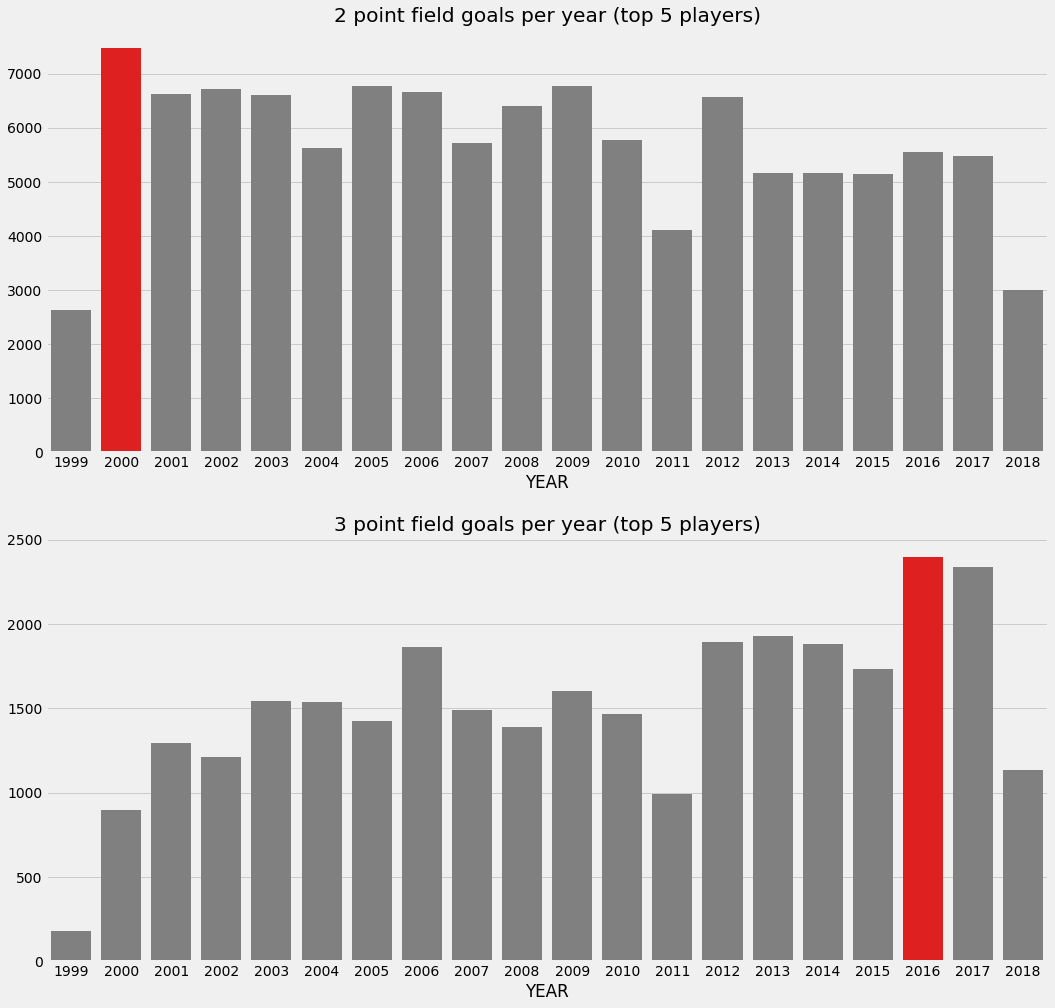

In [259]:
def plot_twos_and_threes(all_year_shots):
    fig, [ax1, ax2] = plt.subplots(2, figsize=(16, 16))
    twos_per_year = all_year_shots.groupby('YEAR')['two'].sum()
    threes_per_year = all_year_shots.groupby('YEAR')['three'].sum()
    two_clrs = ['grey' if (x < max(twos_per_year)) else 'red' for x in twos_per_year]
    three_clrs = ['grey' if (x < max(threes_per_year)) else 'red' for x in threes_per_year]
    sns.barplot(x=twos_per_year.index, y=twos_per_year.values ,ax=ax1, palette=two_clrs)
    ax1.title.set_text("2 point field goals per year (top 5 players)")
    sns.barplot(x=threes_per_year.index, y=threes_per_year.values, ax=ax2, palette=three_clrs)
    ax2.title.set_text("3 point field goals per year (top 5 players)")
    plt.savefig('./plots/twos_and_threes.png')
all_year_shots['two'] = all_year_shots.SHOT_TYPE == '2PT Field Goal'
all_year_shots['three'] = all_year_shots.SHOT_TYPE == '3PT Field Goal'
plot_twos_and_threes(all_year_shots)

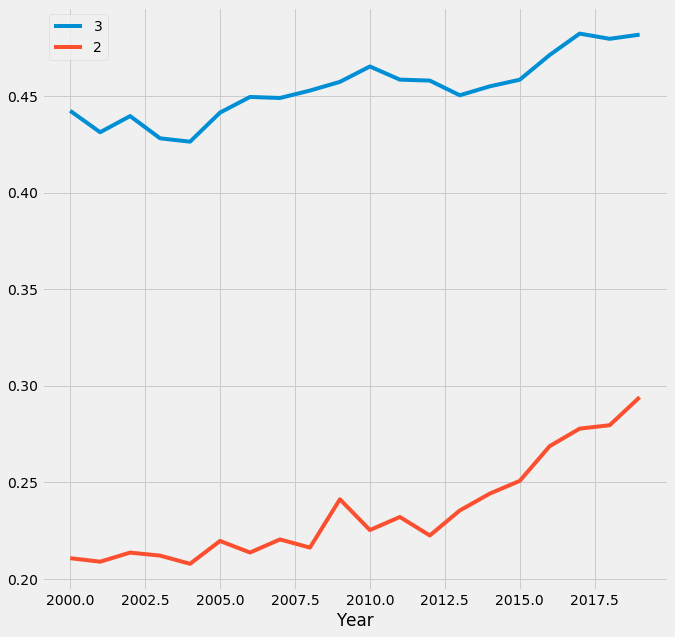

In [294]:
averages = pd.read_csv('./data/player_averages.csv')
two_point = averages.groupby('Year')['2P%'].mean()
three_point = averages.groupby('Year')['3P%'].mean()
fig, ax = plt.subplots(1, figsize=(10,10))
sns.lineplot(x=two_point.index, y=two_point.values, ax=ax)
sns.lineplot(x=three_point.index, y=three_point.values, ax=ax)
ax.legend("32")

In [19]:
averages['Year'] = averages['Year'].fillna(0)

In [321]:
averages.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year'],
      dtype='object')

In [20]:
averages['Year'] = averages['Year'].astype(int)
rel_averages = averages[averages['Year'] == 2019]

In [ ]:
massive_data_set = pd.merge(shots, rel_averages, how='inner', left_on='YEAR', right_on='Year')

In [ ]:
massive_data_set.columns

In [ ]:
rel_data = massive_data_set.drop(['Unnamed: 0_x', 'GRID_TYPE', 'STL', 'BLK', 'TOV', 'PF', 'ORB', 'DRB', 'AST', 'Unnamed: 0_y'], axis=1)

In [8]:
shots.columns

Index(['Unnamed: 0', 'GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'YEAR'],
      dtype='object')

In [21]:
len(rel_averages)

708

In [23]:
shooting_averages = rel_averages[['Player', 'eFG%', 'FG%', 'FGA', '2P%']]

In [24]:
shooting_averages.head()

Player   eFG%    FG%   FGA    2P%
11297  Alex Abrines  0.487  0.357   5.1  0.500
11298    Quincy Acy  0.278  0.222   1.8  0.667
11299  Jaylen Adams  0.459  0.345   3.2  0.361
11300  Steven Adams  0.595  0.595  10.1  0.596
11301   Bam Adebayo  0.579  0.576   5.9  0.588

In [41]:
len(shooting_averages[shooting_averages['FG%'] > 0.4330]) / len(shooting_averages)

0.4985875706214689

In [40]:
shooting_averages.median()

eFG%    0.5070
FG%     0.4330
FGA     6.0000
2P%     0.4995
dtype: float64

In [365]:
shot_data_only = shots[['PLAYER_NAME', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'SHOT_DISTANCE']]

In [366]:
shooting_averages.columns

Index(['Player', 'eFG%', 'FG%', 'FGA', '2P%'], dtype='object')

In [369]:
shot_data_only['two'] = shot_data_only.SHOT_TYPE == '2PT Field Goal'
shot_data_only['three'] = shot_data_only.SHOT_TYPE == '3PT Field Goal'
most_common_zone = shot_data_only.groupby('PLAYER_NAME')['SHOT_ZONE_BASIC'].agg(pd.Series.mode).to_frame()
most_common_zone['Player'] = list(most_common_zone.index)
most_common_area = shot_data_only.groupby('PLAYER_NAME')['SHOT_ZONE_AREA'].agg(pd.Series.mode).to_frame()
most_common_area['Player'] = list(most_common_area.index)
most_common_distance = shot_data_only.groupby('PLAYER_NAME')['SHOT_DISTANCE'].agg(pd.Series.mode).to_frame()
most_common_distance['Player'] = list(most_common_distance.index)
most_common_area.columns
averages_and_shot_info = pd.merge(rel_averages, most_common_area, left_on='Player', right_on='Player', how='inner')
averages_and_shot_info = pd.merge(averages_and_shot_info, most_common_zone, left_on='Player', right_on='Player', how='inner')
averages_and_shot_info = pd.merge(averages_and_shot_info, most_common_distance, left_on='Player', right_on='Player', how='inner')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


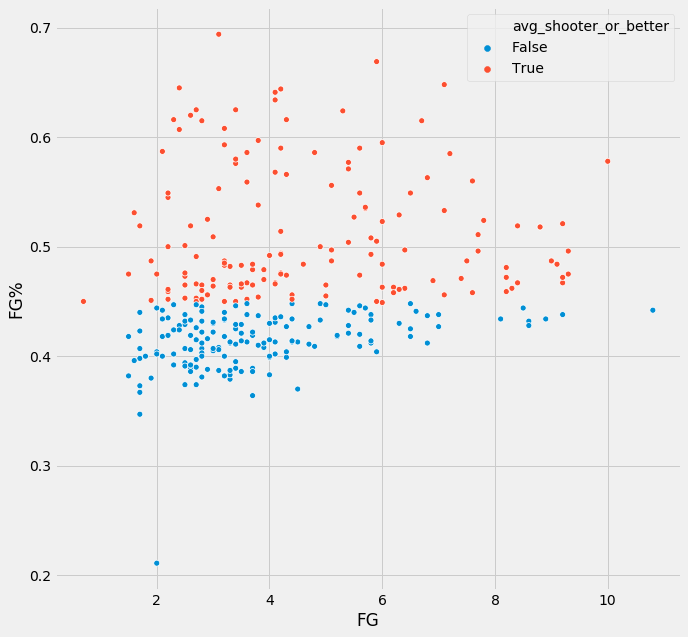

In [370]:
averages_and_shot_info['eFG%'].median()
averages_and_shot_info['avg_shooter_or_better'] = averages_and_shot_info['FG%'] > averages_and_shot_info['FG%'].median()
plt.figure(figsize=(10,10))
sns.scatterplot(x="FG", y="FG%", data=averages_and_shot_info, hue="avg_shooter_or_better")

In [371]:
averages_and_shot_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 36 columns):
Unnamed: 0               312 non-null int64
Rk                       312 non-null int64
Player                   312 non-null object
Pos                      312 non-null object
Age                      312 non-null float64
Tm                       312 non-null object
G                        312 non-null float64
GS                       312 non-null float64
MP                       312 non-null float64
FG                       312 non-null float64
FGA                      312 non-null float64
FG%                      312 non-null float64
3P                       312 non-null float64
3PA                      312 non-null float64
3P%                      312 non-null float64
2P                       312 non-null float64
2PA                      312 non-null float64
2P%                      312 non-null float64
eFG%                     312 non-null float64
FT                       312

In [402]:
averages_and_shot_info
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
X = averages_and_shot_info.drop(['SHOT_DISTANCE', 'Player', 'Rk','Unnamed: 0', 'FT%', '3P', '2P', 'FT', 'FG%', '2P%', '3P%', 'eFG%', 'avg_shooter_or_better'], axis=1)
X = pd.get_dummies(X, columns=['SHOT_ZONE_AREA', 'Tm', 'Pos', 'SHOT_ZONE_BASIC'])
y = averages_and_shot_info['avg_shooter_or_better']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
clf.feature_importances_ # [ 1.,  0.,  0.]
clf.score(X=X_test, y=y_test) # 1.0

TypeError: unhashable type: 'numpy.ndarray'

In [94]:
player_shot_data = shot_data_only.groupby('PLAYER_NAME').sum()

In [95]:
player_shot_data

SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG     two  three
PLAYER_NAME                                                            
Aaron Gordon                        1046             470   699.0  347.0
Al Horford                           723             387   520.0  203.0
Al-Farouq Aminu                      593             257   313.0  280.0
Alec Burks                           474             192   306.0  168.0
Alex Len                             648             320   444.0  204.0
Alfonzo McKinnie                     275             134   157.0  118.0
Allonzo Trier                        518             232   386.0  132.0
Andre Drummond                      1052             561  1014.0   38.0
Andre Iguodala                       302             151   158.0  144.0
Andrew Wiggins                      1209             498   861.0  348.0
Ante Zizic                           331             183   331.0    0.0
Anthony Tolliver                     259              99    44.0  215.0
Austin Rivers                        572             232   245.0  327.0
Avery Bradley                        608             248   363.0  245.0
Bam Adebayo                          486             280   471.0   15.0
Ben Simmons                          960             540   954.0    6.0
Blake Griffin                       1341             619   819.0  522.0
Boban Marjanovic                     260             160   250.0   10.0
Bogdan Bogdanovic                    863             361   491.0  372.0
Bojan Bogdanovic                    1051             522   665.0  386.0
Bradley Beal                        1609             764  1013.0  596.0
Brook Lopez                          786             355   274.0  512.0
Bruce Brown                          314             125   221.0   93.0
Bryn Forbes                          791             361   378.0  413.0
Buddy Hield                         1360             623   709.0  651.0
CJ McCollum                         1243             571   798.0  445.0
Cedi Osman                           844             360   470.0  374.0
Cheick Diallo                        271             168   267.0    4.0
Chris Paul                           720             302   365.0  355.0
Clint Capela                         732             474   732.0    0.0
...                                  ...             ...     ...    ...
Steven Adams                         809             481   807.0    2.0
T.J. McConnell                       419             220   377.0   42.0
Taj Gibson                           537             304   503.0   34.0
Terrance Ferguson                    431             185   141.0  290.0
Terrence Ross                       1027             440   461.0  566.0
Terry Rozier                         666             258   329.0  337.0
Thaddeus Young                       841             443   695.0  146.0
Thomas Bryant                        502             309   403.0   99.0
Thon Maker                           268             109   115.0  153.0
Tim Frazier                          261             116   160.0  101.0
Tim Hardaway Jr.                     993             390   516.0  477.0
Tobias Harris                       1254             611   861.0  393.0
Tomas Satoransky                     530             257   368.0  162.0
Tony Snell                           361             163   157.0  204.0
Torrey Craig                         362             160   174.0  188.0
Trae Young                          1256             525   774.0  482.0
Trevor Ariza                         736             294   302.0  434.0
Trey Burke                           548             236   389.0  159.0
Trey Lyles                           495             207   295.0  200.0
Tyreke Evans                         660             257   444.0  216.0
Tyus Jones                           446             185   320.0  126.0
Vince Carter                         468             196   152.0  316.0
Wayne Selden                         483             196   30

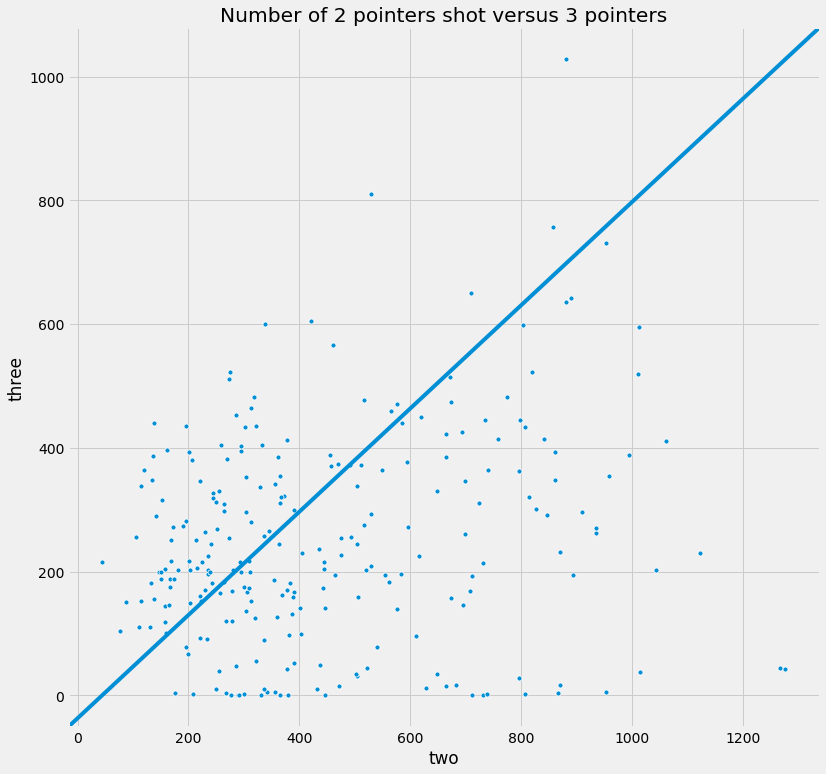

In [359]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.title("Number of 2 pointers shot versus 3 pointers")
sns.scatterplot(x='two', y='three', data=player_shot_data, ax=ax, s=25)


In [142]:
all_player_shot_data = pd.merge(player_shot_data, shooting_averages, left_on='PLAYER_NAME', right_on='Player', how='inner')

In [145]:
midrange_players = all_player_shot_data[all_player_shot_data['two'] > all_player_shot_data['three']]

In [146]:
outside_shooters = all_player_shot_data[all_player_shot_data['two'] < all_player_shot_data['three']]

In [149]:
midrange_players.SHOT_MADE_FLAG.sum() / midrange_players.SHOT_ATTEMPTED_FLAG.sum()

0.47452486858067122

In [150]:
outside_shooters.SHOT_MADE_FLAG.sum() / outside_shooters.SHOT_ATTEMPTED_FLAG.sum()

0.42092010072345015

In [92]:
# plot relationship between percentage of shots that are 3s, and field goal percentage
# create dataframe with data about the number of 2s and 3s made, as well as the number of "safe shots" versus "unsafe shots"

In [93]:
len(rel_averages)

708

In [98]:
rel_averages.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year'],
      dtype='object')

In [100]:
combined_shot_data = pd.merge(rel_averages, player_shot_data, left_on='Player', right_on='PLAYER_NAME', how='inner')

In [103]:
combined_shot_data.rename(index=str, columns={'SHOT_ATTEMPTED_FLAG': 'attempts', 'SHOT_MADE_FLAG': 'makes'})

Unnamed: 0   Rk                 Player    Pos   Age   Tm     G    GS  \
0         11300    3           Steven Adams      C  25.0  OKC  80.0  80.0   
1         11301    4            Bam Adebayo      C  21.0  MIA  82.0  28.0   
2         11304    7      LaMarcus Aldridge      C  33.0  SAS  81.0  81.0   
3         11307   10          Jarrett Allen      C  20.0  BRK  80.0  80.0   
4         11309   12        Al-Farouq Aminu     PF  28.0  POR  81.0  81.0   
5         11316   19  Giannis Antetokounmpo     PF  24.0  MIL  72.0  72.0   
6         11320   23             OG Anunoby     SF  21.0  TOR  67.0   6.0   
7         11321   24       Ryan Arcidiacono     PG  24.0  CHI  81.0  32.0   
8         11322   25           Trevor Ariza     SF  33.0  TOT  69.0  69.0   
9         11323   26           Trevor Ariza     SF  33.0  PHO  26.0  26.0   
10        11324   27           Trevor Ariza     SF  33.0  WAS  43.0  43.0   
11        11325   28          D.J. Augustin     PG  31.0  ORL  81.0  81.0   
12        11326   29          Deandre Ayton      C  20.0  PHO  71.0  70.0   
13        11336   39        Harrison Barnes  PF-SF  26.0  TOT  77.0  77.0   
14        11337   40        Harrison Barnes     PF  26.0  DAL  49.0  49.0   
15        11338   41        Harrison Barnes     SF  26.0  SAC  28.0  28.0   
16        11341   44          Nicolas Batum     SF  30.0  CHO  75.0  72.0   
17        11344   47          Kent Bazemore     SG  29.0  ATL  67.0  35.0   
18        11345   48           Bradley Beal     SG  25.0  WAS  82.0  82.0   
19        11347   50          Malik Beasley     SG  22.0  DEN  81.0  18.0   
20        11349   52        Marco Belinelli     SG  32.0  SAS  79.0   1.0   
21        11351   54        DeAndre' Bembry     SG  24.0  ATL  82.0  15.0   
22        11354   57          Davis Bertans     PF  26.0  SAS  76.0  12.0   
23        11355   58       Patrick Beverley     PG  30.0  LAC  78.0  49.0   
24        11358   61        Nemanja Bjelica     PF  30.0  SAC  77.0  70.0   
25        11360   63           Eric Bledsoe     PG  29.0  MIL  78.0  78.0   
26        11362   65      Bogdan Bogdanovic     SG  26.0  SAC  70.0  17.0   
27        11363   66       Bojan Bogdanovic     SF  29.0  IND  81.0  81.0   
28        11368   71           Devin Booker     SG  22.0  PHO  64.0  64.0   
29        11370   73          Avery Bradley     SG  28.0  TOT  63.0  63.0   
..          ...  ...                    ...    ...   ...  ...   ...   ...   
282       11952  655         Garrett Temple     SG  32.0  MEM  49.0  49.0   
283       11953  656         Garrett Temple     SG  32.0  LAC  26.0   6.0   
284       11959  662           Daniel Theis      C  26.0  BOS  66.0   2.0   
285       11963  666          Klay Thompson     SG  28.0  GSW  78.0  78.0   
286       11966  669       Anthony Tolliver     PF  33.0  MIN  65.0   0.0   
287       11967  670     Karl-Anthony Towns      C  23.0  MIN  77.0  77.0   
288       11970  673          Allonzo Trier     SG  23.0  NYK  64.0   3.0   
289       11972  675            Evan Turner     PG  30.0  POR  73.0   2.0   
290       11973  676           Myles Turner      C  22.0  IND  74.0  74.0   
291       11980  683          Fred VanVleet     PG  24.0  TOR  64.0  28.0   
292       11981  684            Noah Vonleh     PF  23.0  NYK  68.0  57.0   
293       11982  685         Nikola Vucevic      C  28.0  ORL  80.0  80.0   
294       11983  686            Dwyane Wade     SG  37.0  MIA  72.0   2.0   
295       11986  689           Kemba Walker     PG  28.0  CHO  82.0  82.0   
296       11997  700      Russell Westbrook     PG  30.0  OKC  73.0  73.0   
297       11998  701          Derrick White     PG  24.0  SAS  67.0  55.0   
298       12000  703       Hassan Whiteside      C  29.0  MIA  72.0  53.0   
299       12001  704         Andrew Wiggins     SF  23.0  MIN  73.0  73.0   
300       12006  709           Lou Williams     SG  32.0  LAC  75.0   1.0   
301       12007  710        Marvin Williams     PF  32.0  CHO  75.0  75.0   
3

In [ ]:
team_shots = combined_shot_data.groupby